# Problem Definition

📌 Clean and preprocess the data
📌 Do Exploratory Data Analysis (EDA) to get some insight into data
📌 Do Feature Engineering
📌 Build a model i.e Regression Analysis
📌 Evaluate the model
📌 Go back to any of the previous steps unless the result is sufficient.

# Variable Exploration

Initial Analysis

1) Carat: Larger diamonds are usually harder to find than the smaller one. Therefore, carat can contribute considerably to diamond price.

2) Cut: diamonds are inherently priced by their carat weight. When more rough material is removed, the loss in carat weight for better cut quality has to be compensated with higher prices.

3) Color : Color defines beauty and beauty means price.

4) depth: height from lower to higher end. 

5) x, y, z : Dimension of the diamond.

### Importing libraries

In [77]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

### Importing dataset

In [78]:
dataset = pd.read_csv('cubic_zirconia.csv')
dataset.shape

(26967, 11)

### Variable exploration and manipulation

In [79]:
dataset.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [80]:
dataset.tail()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
26962,26963,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,26964,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,26965,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,26966,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682
26966,26967,1.25,Premium,J,SI1,62.0,58.0,6.90,6.88,4.27,5166


In [81]:
# 'Price' variable is dependent variable and others are independent variable.
dataset.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x',
       'y', 'z', 'price'],
      dtype='object')

In [82]:
# Categorising whether the variable is categorical or continuous.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [83]:
# Unnamed column of index 0 is irrelevant
dataset.drop('Unnamed: 0', axis=1, inplace=True)
dataset.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [84]:
# descriptive Statistics of our dataset
dataset.describe()

,carat,depth,table,x,y,z,price
count,26967.000000,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
mean,0.798375,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,0.477745,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000
max,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


1) Since the number of rows of our dataset and counts of each variable except 'depth' are equal.We can conclude that there are no null values in our dataset except for .

2) The columns x, y, z, which represents - dimension of diamond. From the above descriptive statistics table, we can note that minimum dimension is 0 which is not practically possible. Therefore we can drop those rows containing zero dimension.

In [85]:
dataset = dataset[(dataset.x != 0) & (dataset.y != 0) & (dataset.z != 0)]
dataset.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [86]:
dataset.describe()

,carat,depth,table,x,y,z,price
count,26958.000000,26261.000000,26958.000000,26958.000000,26958.000000,26958.000000,26958.000000
mean,0.798190,61.745345,57.455342,5.730105,5.733832,3.539238,3938.311262
std,0.477602,1.412395,2.231227,1.126714,1.164342,0.717838,4023.359737
min,0.200000,50.800000,49.000000,3.730000,3.710000,1.070000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.712500,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.700000,3.520000,2375.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5358.000000
max,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


In [87]:
# Removing duplicate data.
dataset.drop_duplicates(inplace=True)
dataset.shape

(26925, 10)

In [88]:
# Getting summary statistics of object type variables
dataset.describe(include = 'object')

,cut,color,clarity
count,26925,26925,26925
unique,5,7,8
top,Ideal,G,SI1
freq,10805,5650,6564


In [89]:
print(dataset['cut'].unique())
print(dataset['color'].unique())
print(dataset['clarity'].unique())

['Ideal' 'Premium' 'Very Good' 'Good' 'Fair']
['E' 'G' 'F' 'D' 'H' 'J' 'I']
['SI1' 'IF' 'VVS2' 'VS1' 'VVS1' 'VS2' 'SI2' 'I1']


### Treating missing values

In [90]:
# Checking for missing values
dataset.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [91]:
# Imputing the missing values with its median.
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer.fit(dataset.iloc[:, 4:9])
dataset.iloc[:, 4:9] = imputer.transform(dataset.iloc[:, 4:9])

In [92]:
print(dataset.iloc[26,4])

61.8


### Dealing Outliers

In [93]:
df = dataset
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


AxesSubplot(0.125,0.125;0.775x0.755)


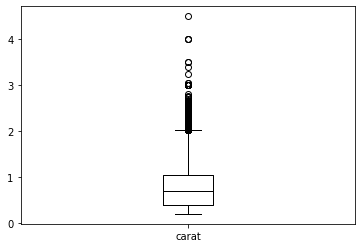

In [94]:
print(df.boxplot(column=['carat'],grid = False, color='black'))

AxesSubplot(0.125,0.125;0.775x0.755)


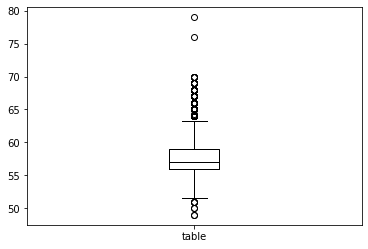

In [95]:
print(df.boxplot(column=['table'],grid = False, color='black'))

AxesSubplot(0.125,0.125;0.775x0.755)


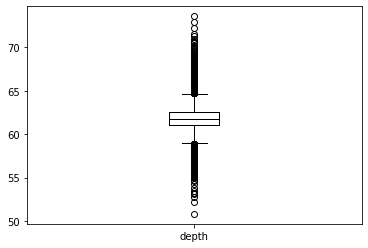

In [96]:
print(df.boxplot(column=['depth'],grid = False, color='black'))

AxesSubplot(0.125,0.125;0.775x0.755)


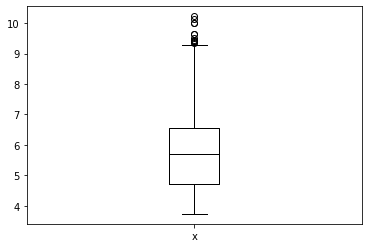

In [97]:
print(df.boxplot(column=['x'],grid = False, color='black'))

AxesSubplot(0.125,0.125;0.775x0.755)


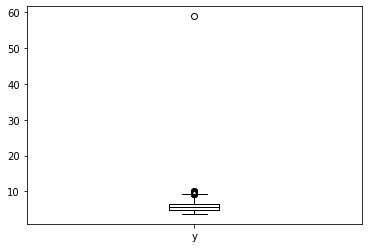

In [98]:
print(df.boxplot(column=['y'],grid = False, color='black'))

AxesSubplot(0.125,0.125;0.775x0.755)


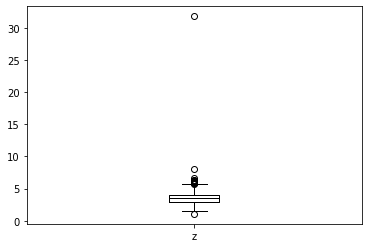

In [99]:
print(df.boxplot(column=['z'],grid = False, color='black'))

In [100]:
from scipy import stats
df['carat_stat'] = stats.zscore(df['carat'])
df['depth_stat'] = stats.zscore(df['depth'])
df['table_stat'] = stats.zscore(df['table'])
df['x_stat'] = stats.zscore(df['x'])
df['y_stat'] = stats.zscore(df['y'])
df['z_stat'] = stats.zscore(df['z'])

In [101]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price,carat_stat,depth_stat,table_stat,x_stat,y_stat,z_stat
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499,-1.043484,0.253344,0.244117,-1.296010,-1.240036,-1.224888
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984,-0.980601,-0.679605,0.244117,-1.162802,-1.093962,-1.169137
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289,0.214178,0.325110,1.140461,0.275843,0.332401,0.336153
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082,-0.791951,-0.105482,-0.652227,-0.807581,-0.801816,-0.806752
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779,-1.022523,-0.966666,0.692289,-1.224966,-1.119740,-1.238826


In [102]:
# print(df[['carat','carat_stat']].describe().round(3))
# print(df[['depth','depth_stat']].describe().round(3))
# print(df[['table','table_stat']].describe().round(3))
# print(df[['x','x_stat']].describe().round(3))
# print(df[['y','y_stat']].describe().round(3))
# print(df[['z','z_stat']].describe().round(3))

Taking z-score and dropping data that has z_score more than 3 threshhold.

In [103]:
df = df[(df['carat_stat']<3.0) & (df['depth_stat']<3.0) & (df['table_stat']<3.0) & (df['x_stat']<3.0) & (df['y_stat']<3.0) & (df['z_stat']<3.0)]

In [104]:
# print(df[['carat','carat_stat']].describe().round(3))
# print(df[['depth','depth_stat']].describe().round(3))
# print(df[['table','table_stat']].describe().round(3))
# print(df[['x','x_stat']].describe().round(3))
# print(df[['y','y_stat']].describe().round(3))
# print(df[['z','z_stat']].describe().round(3))

In [105]:
df.drop(['carat_stat','depth_stat','x_stat','y_stat','z_stat','table_stat'],axis=1,inplace=True)
df.head()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_1140\2797730172.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['carat_stat','depth_stat','x_stat','y_stat','z_stat','table_stat'],axis=1,inplace=True)


,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [106]:
df.shape

(26348, 10)

### Univariate analysis

In [107]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [108]:
df.shape

(26348, 10)

In [109]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

In [110]:
# Tabular method for univariate analysis
df.describe()

,carat,depth,table,x,y,z,price
count,26348.000000,26348.000000,26348.000000,26348.000000,26348.000000,26348.000000,26348.000000
mean,0.781441,61.717732,57.393313,5.699483,5.702759,3.517826,3839.642895
std,0.453303,1.284063,2.110511,1.100792,1.093721,0.678675,3900.316950
min,0.200000,50.800000,49.000000,3.730000,3.710000,1.070000,326.000000
25%,0.390000,61.100000,56.000000,4.690000,4.700000,2.890000,935.000000
50%,0.700000,61.800000,57.000000,5.680000,5.690000,3.510000,2332.000000
75%,1.040000,62.500000,59.000000,6.530000,6.530000,4.030000,5261.250000
max,2.220000,65.900000,64.000000,8.800000,8.690000,5.300000,18818.000000


C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


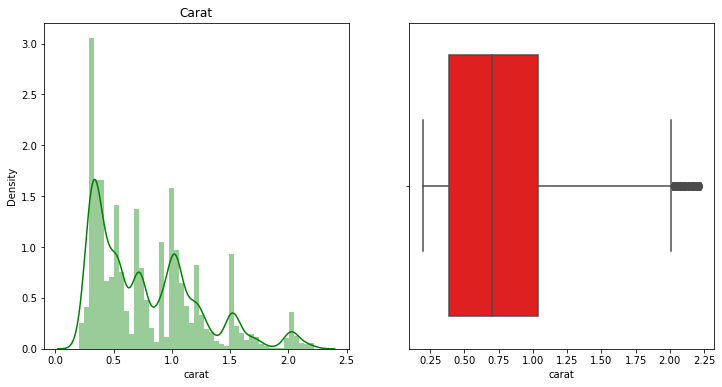

In [133]:
# Plotting histogram for 'Carat' variable.
fig, axes = plt.subplots(1,2, figsize=(12,6))

sn.distplot(df['carat'], hist = True,kde=True, color='g', ax = axes[0])

sn.boxplot(df['carat'], color = 'red', ax = axes[1])
axes[0].set_title('Carat')
plt.show()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


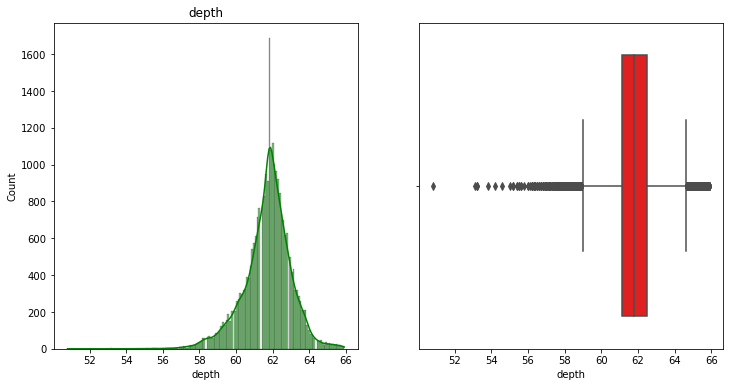

In [135]:
# Analysing the variable 'depth'
fig, axes = plt.subplots(1,2, figsize=(12,6))

sn.histplot(df['depth'],kde=True, color='g', ax = axes[0])

sn.boxplot(df['depth'], color = 'red', ax = axes[1])
axes[0].set_title('depth')
plt.show()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


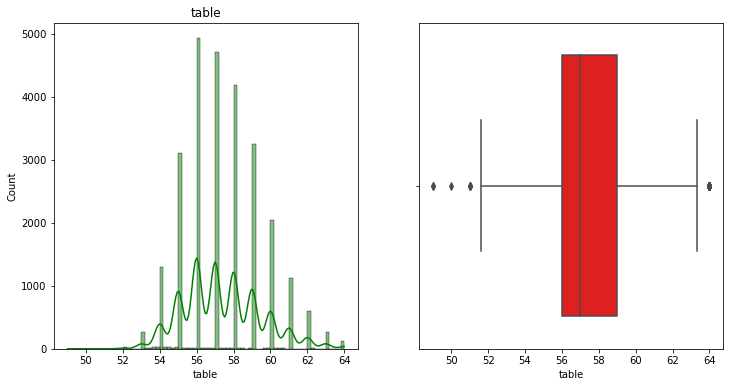

In [136]:
# Analysing the variable 'table'
fig, axes = plt.subplots(1,2, figsize=(12,6))

sn.histplot(df['table'],kde=True, color='g', ax = axes[0])

sn.boxplot(df['table'], color = 'red', ax = axes[1])
axes[0].set_title('table')
plt.show()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


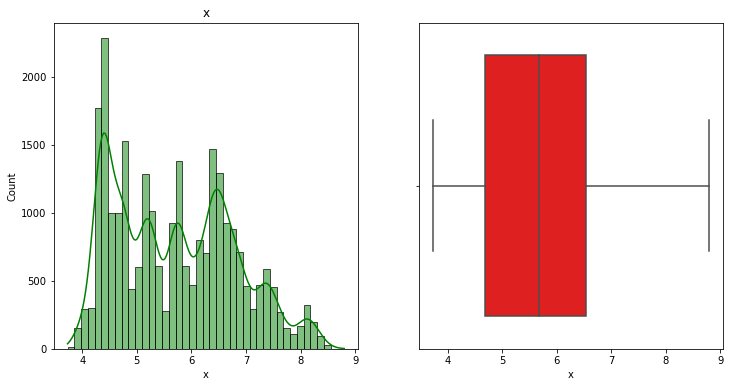

In [137]:
# Analysing the variable 'x'
fig, axes = plt.subplots(1,2, figsize=(12,6))

sn.histplot(df['x'],kde=True, color='g', ax = axes[0])

sn.boxplot(df['x'], color = 'red', ax = axes[1])
axes[0].set_title('x')
plt.show()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


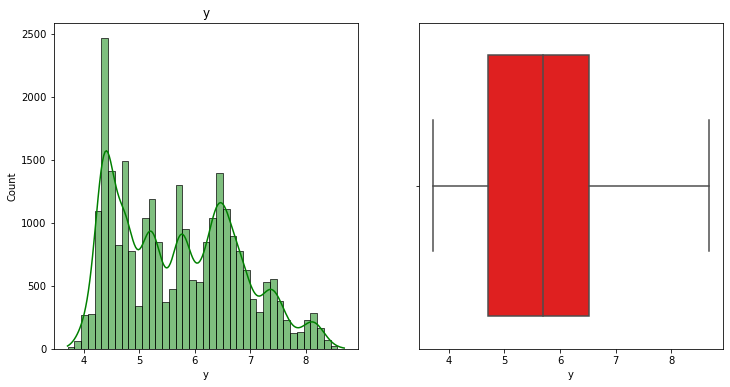

In [138]:
# Analysing the variable 'y'
fig, axes = plt.subplots(1,2, figsize=(12,6))

sn.histplot(df['y'],kde=True, color='g', ax = axes[0])

sn.boxplot(df['y'], color = 'red', ax = axes[1])
axes[0].set_title('y')
plt.show()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


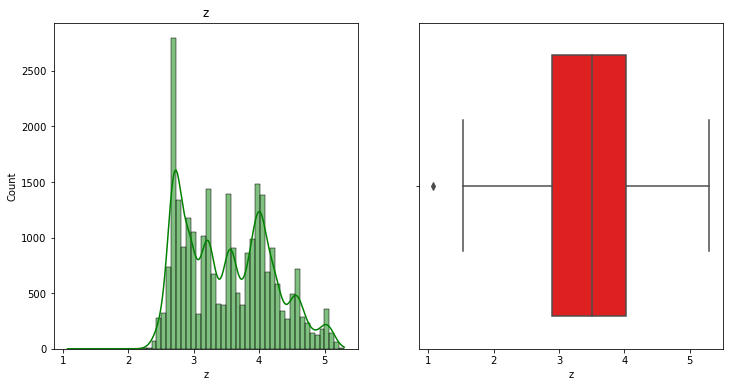

In [139]:
# Analysing the variable 'z'
fig, axes = plt.subplots(1,2, figsize=(12,6))

sn.histplot(df['z'],kde=True, color='g', ax = axes[0])

sn.boxplot(df['z'], color = 'red', ax = axes[1])
axes[0].set_title('z')
plt.show()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


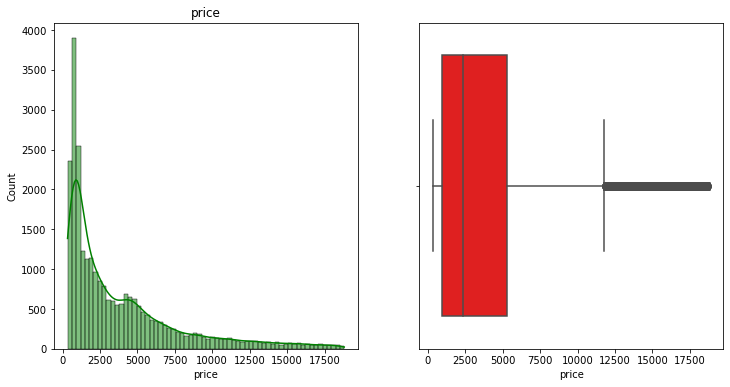

In [144]:
fig, axes = plt.subplots(1,2, figsize=(12,6))

sn.histplot(df['price'],kde=True, color='g', ax = axes[0])

sn.boxplot(df['price'], color = 'red', ax = axes[1])
axes[0].set_title('price')
plt.show()

In [149]:
df.skew()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_1140\1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


carat    0.940475
depth   -0.547149
table    0.437682
x        0.352448
y        0.348894
z        0.342867
price    1.627821
dtype: float64

Observations: 

1) Outliers has been removed using z-score method( somewhat evident by looking at box plot).

2) Variables like 'carat' and 'price' are right-skewed.(Evident from both plot and skew value).

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


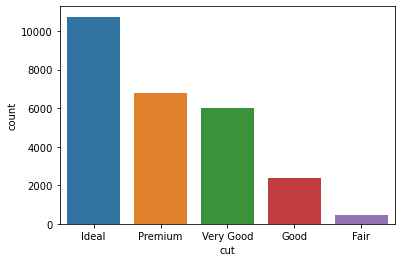

In [118]:
# Analysing the variable 'cut'
sn.countplot(df.cut)
plt.show()

In [141]:
df.groupby(['cut']).count()

,carat,color,clarity,depth,table,x,y,z,price
cut,,,,,,,,,
Fair,465,465,465,465,465,465,465,465,465
Good,2351,2351,2351,2351,2351,2351,2351,2351,2351
Ideal,10747,10747,10747,10747,10747,10747,10747,10747,10747
Premium,6799,6799,6799,6799,6799,6799,6799,6799,6799
Very Good,5986,5986,5986,5986,5986,5986,5986,5986,5986


C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


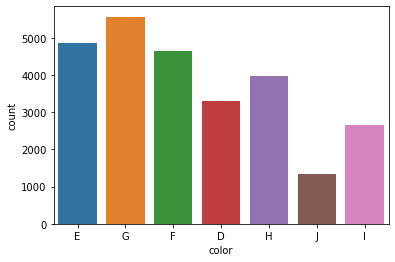

In [142]:
sn.countplot(df.color)
plt.show()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


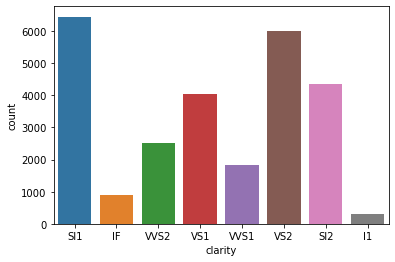

In [143]:
sn.countplot(df.clarity)
plt.show()

Observations:

1) Ideal cut is more, therefore having a chance of less price.

### Multivariate analysis

In [145]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


<AxesSubplot:>

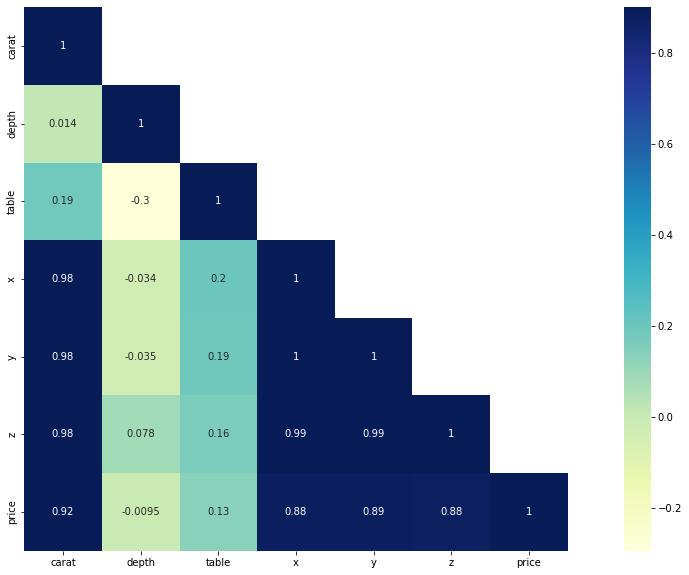

In [147]:
# Creating a heatmap to check correlation between variables.
corr = df[["carat","depth","table","x","y","z","price"]].corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu")

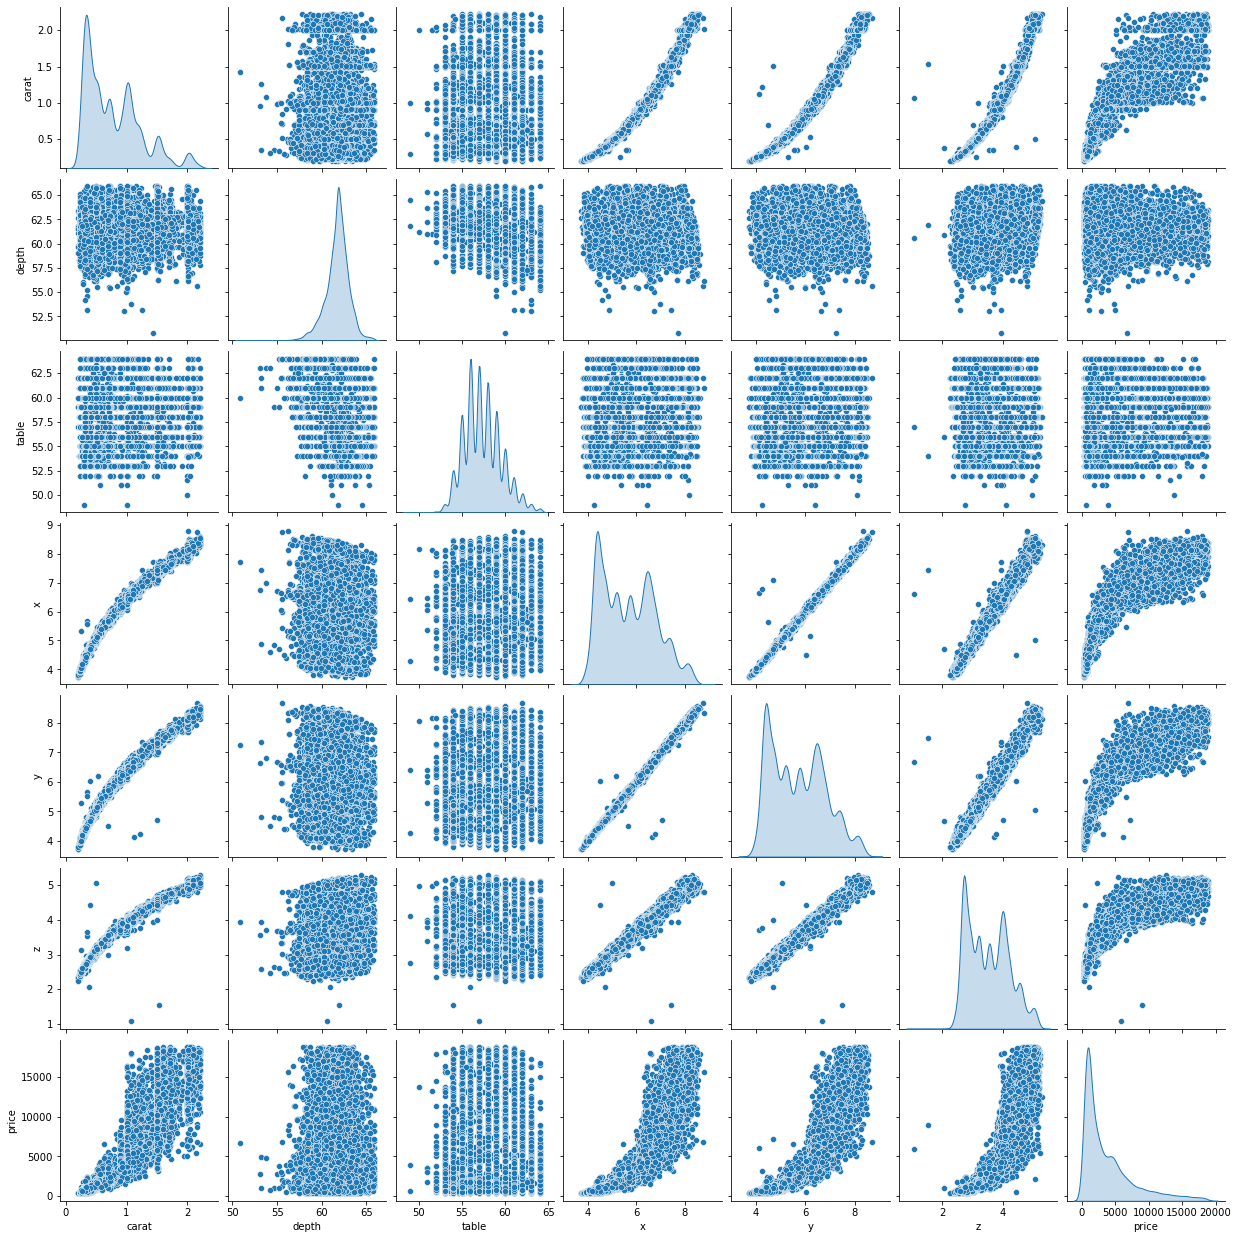

In [153]:
# Creating a pairplot to compare different variables.
sn.pairplot(df[['carat','cut','color','clarity','depth','table','x','y','z','price']], diag_kind = 'kde')
plt.show()

Observation:

1) x, y, z have high correlation with each other. Therefore two out of this variables can be dropped.

2) 'depth' have very low correlation with our target variable. Therefore we can drop 'depth' column.

In [154]:
df.drop(['depth','y','z'],axis=1 ,inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_1140\3888375897.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['depth','y','z'],axis=1 ,inplace=True)


In [155]:
df.head()

,carat,cut,color,clarity,table,x,price
0,0.30,Ideal,E,SI1,58.0,4.27,499
1,0.33,Premium,G,IF,58.0,4.42,984
2,0.90,Very Good,E,VVS2,60.0,6.04,6289
3,0.42,Ideal,F,VS1,56.0,4.82,1082
4,0.31,Ideal,F,VVS1,59.0,4.35,779
